In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('indicator.csv')
df

,num_posts,num_c_with,num_c,indicator,date_num,date
0,5,4,16,0.800000,18871,2021-09-01
1,6,5,53,0.833333,18872,2021-09-02
2,1,0,3,0.000000,18873,2021-09-03
3,0,0,1,NaN,18874,2021-09-04
4,1,0,1,0.000000,18875,2021-09-05
...,...,...,...,...,...,...
482,7,1,39,0.142857,19353,2022-12-27
483,8,1,40,0.125000,19354,2022-12-28
484,8,3,97,0.375000,19355,2022-12-29
485,3,2,41,0.666667,19356,2022-12-30


In [3]:
df_month=pd.DataFrame()
df_month['date']=['2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12']
df_month['sum_i']=0
df_month['n']=0
df_month=df_month.set_index('date')
df_month['date']=df_month.index
df_month

,sum_i,n,date
date,,,
2021-09,0,0,2021-09
2021-10,0,0,2021-10
2021-11,0,0,2021-11
2021-12,0,0,2021-12
2022-01,0,0,2022-01
2022-02,0,0,2022-02
2022-03,0,0,2022-03
2022-04,0,0,2022-04
2022-05,0,0,2022-05


In [4]:
i=0
for i in range (len(df)):
    if math.isnan(df['indicator'][i])==False and math.isinf(df['indicator'][i])==False:
        df_month.loc[df['date'][i][:7],'sum_i']=df_month['sum_i'][df['date'][i][:7]]+df['indicator'][i]
        df_month.loc[df['date'][i][:7],'n']=df_month['n'][df['date'][i][:7]]+1

In [5]:
df_month

,sum_i,n,date
date,,,
2021-09,8.919048,26,2021-09
2021-10,8.250816,28,2021-10
2021-11,14.514524,29,2021-11
2021-12,13.514060,30,2021-12
2022-01,12.026202,28,2022-01
2022-02,6.449351,23,2022-02
2022-03,19.151190,27,2022-03
2022-04,15.066635,29,2022-04
2022-05,11.972475,29,2022-05


In [6]:
df_month['indicator']=df_month['sum_i']/df_month['n']
df_month

,sum_i,n,date,indicator
date,,,,
2021-09,8.919048,26,2021-09,0.343040
2021-10,8.250816,28,2021-10,0.294672
2021-11,14.514524,29,2021-11,0.500501
2021-12,13.514060,30,2021-12,0.450469
2022-01,12.026202,28,2022-01,0.429507
2022-02,6.449351,23,2022-02,0.280407
2022-03,19.151190,27,2022-03,0.709303
2022-04,15.066635,29,2022-04,0.519539
2022-05,11.972475,29,2022-05,0.412844


In [7]:
df_month['indicator'].to_csv('indicator_month.csv', index=False)

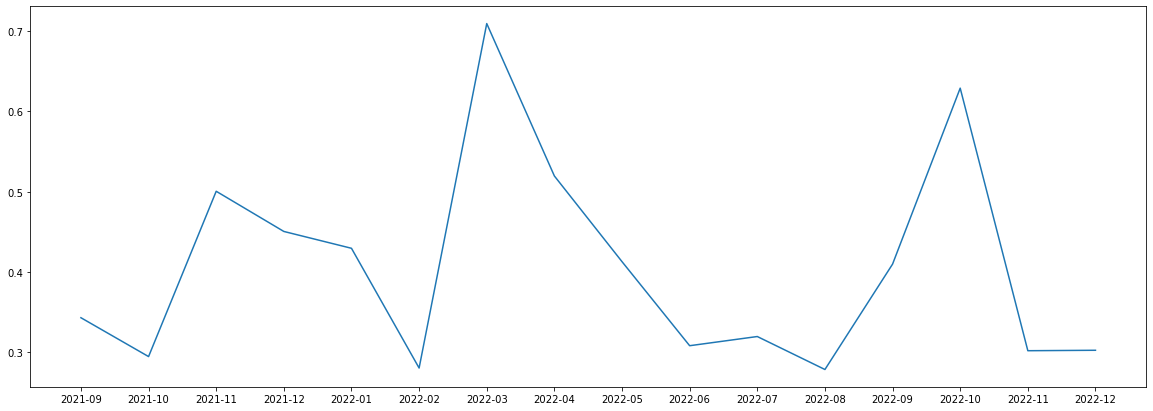

In [8]:
plt.figure(figsize=(20, 7))
plt.plot(df_month['indicator'])

In [9]:
df_month['stat_IE']=[12.3, 13.6, 13.5, 14.8, 13.7, 13.5, 18.3, 12.5, 11.5, 12.4, 10.8, 12.0, 12.5, 12.8, 12.2, 12.1]

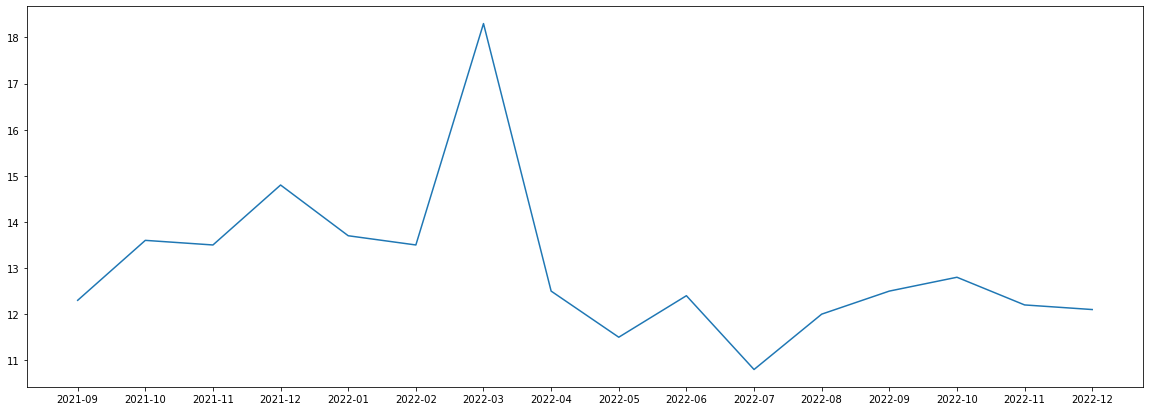

In [10]:
plt.figure(figsize=(20, 7))
plt.plot(df_month['stat_IE'])

In [11]:
import numpy as np

In [12]:
np.corrcoef(df_month['stat_IE'].astype(float), df_month['indicator'].astype(float))

array([[1.        , 0.63378423],
       [0.63378423, 1.        ]])

In [13]:
import scipy.stats

In [14]:
scipy.stats.pearsonr(df_month['stat_IE'].astype(float), df_month['indicator'].astype(float))

(0.6337842291320225, 0.008383261851103998)

In [15]:
scipy.stats.spearmanr(df_month['stat_IE'].astype(float), df_month['indicator'].astype(float))

SpearmanrResult(correlation=0.4447722054789559, pvalue=0.0843101512675355)

In [16]:
Big_Data=np.array(df_month['indicator'])
FOM=np.array(df_month['stat_IE'])

In [17]:
import statsmodels.api as sm

In [18]:
sm.tsa.stattools.ccf(Big_Data, FOM)

array([ 0.63378423,  0.42621005,  0.04932995, -0.02720893,  0.00764385,
       -0.21592726, -0.15225912,  0.55103852, -0.427316  , -0.32503543,
        0.21668961, -0.0504242 , -0.128874  , -0.43447737,  0.04133235,
        0.36319627])

In [19]:
sm.tsa.stattools.ccf(FOM, Big_Data)

array([ 0.63378423, -0.19114366, -0.18501308, -0.0018697 , -0.06500298,
       -0.2991231 , -0.22715643, -0.04636462, -0.26158101, -0.01299357,
        0.2328528 ,  0.04046752, -0.07436022,  0.02944129,  0.37417166,
        0.28074519])

In [20]:
Inflation=[7.40, 8.13, 8.40, 8.39, 8.73, 9.15, 16.69, 17.83, 17.10, 15.90, 15.10, 14.30, 13.68, 12.63, 11.98, 11.94]

In [21]:
scipy.stats.pearsonr(Inflation, df_month['indicator'].astype(float))

(0.2615941335589539, 0.3277372463164325)

In [22]:
sm.tsa.stattools.ccf(Big_Data, Inflation)

array([ 0.26159413, -0.13831965, -0.45624582, -0.46898035, -0.32263173,
       -0.13099701, -0.11939017,  0.12319878, -0.15133988,  0.13091377,
        0.29011078,  0.23322623, -0.08265696, -0.19795581,  1.07762047,
        1.16032906])

In [23]:
sm.tsa.stattools.ccf(Inflation, Big_Data)

array([ 0.26159413,  0.17235291,  0.17173439,  0.24098207,  0.3861021 ,
        0.20961899,  0.00637946, -0.12297349, -0.1427407 , -0.11451125,
       -0.07956135, -0.1229674 , -0.09597789, -0.01262317,  0.07518944,
        0.0562897 ])

In [24]:
sm.tsa.stattools.ccf(FOM, Inflation)

array([-0.10149183, -0.67951005, -0.73595838, -0.70470647, -0.56830913,
       -0.33184723, -0.25700878,  0.30387772,  0.36857316,  0.44863611,
        0.704023  ,  0.51668446,  0.45775413,  0.48074183,  0.69654023,
        0.79847529])

In [25]:
sm.tsa.stattools.ccf(Inflation, FOM)

array([-0.10149183,  0.07207409,  0.16770572,  0.35191436,  0.43329123,
        0.4705012 ,  0.32974341,  0.1843815 ,  0.0585813 ,  0.0054803 ,
       -0.00499915, -0.04948849, -0.07296038, -0.03490307,  0.00302664,
        0.0501116 ])

In [26]:
CPI=[100.60, 101.11, 100.96, 100.82, 100.99, 101.17, 107.61, 101.56, 100.12, 99.65, 99.61, 99.48, 100.05, 100.18, 100.37, 100.78]

In [27]:
sm.tsa.stattools.ccf(CPI, Big_Data)

array([ 0.65219054, -0.14905577, -0.00618064,  0.03709765,  0.12400158,
       -0.42790695, -0.35657252, -0.17012226, -0.06279839,  0.03384491,
        0.09699927,  0.0774048 ,  0.08603148,  0.13934105,  0.11712743,
        0.04406949])

In [28]:
sm.tsa.stattools.ccf(Big_Data, CPI)

array([ 0.65219054,  0.34130391,  0.02910011, -0.23552542, -0.26003076,
       -0.27241517,  0.12166521,  0.71590356, -0.38697882, -0.42707326,
       -0.0347414 ,  0.04873019,  0.05110908, -0.13920453,  0.03924873,
        0.15365279])

In [29]:
sm.tsa.stattools.ccf(FOM, CPI)

array([ 0.89234801,  0.07751232, -0.11202379, -0.08194704, -0.34715145,
       -0.1312497 , -0.13259553, -0.04739068, -0.23703079, -0.31027424,
        0.01951537,  0.02084973,  0.01992954, -0.00874176,  0.02104728,
        0.10573548])

In [30]:
sm.tsa.stattools.ccf(CPI, FOM)

array([ 0.89234801,  0.32295319,  0.17892992,  0.28473844,  0.00578885,
       -0.13199833, -0.40204646, -0.32292165, -0.30025841, -0.175902  ,
       -0.11531338, -0.06078367, -0.0278005 ,  0.01732148,  0.05423632,
        0.03923263])